In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Load Train data

In [24]:
train_df = '/kaggle/input/titanic/train.csv'
df_train = pd.read_csv(train_df)

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# checking the null values in the dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Check the data types and statistics of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Perform statistical summary
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# Handle missing values of Age with average value and 'Embarked' with median value
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

In [30]:
# drop the irrelevant columns

df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [31]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## EDA

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

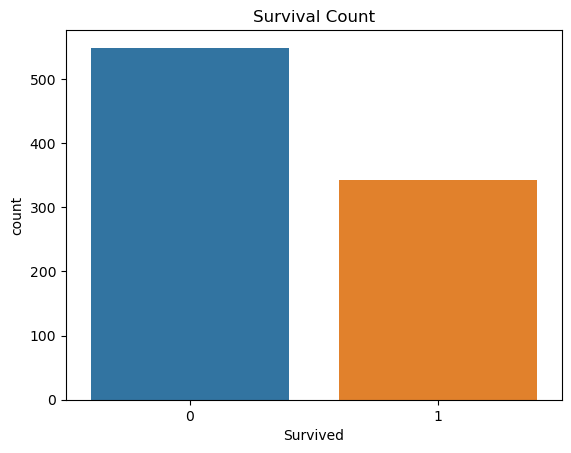

In [33]:
# Check the distribution of the target variable
sns.countplot(x='Survived', data=df_train)
plt.title('Survival Count')
plt.show()


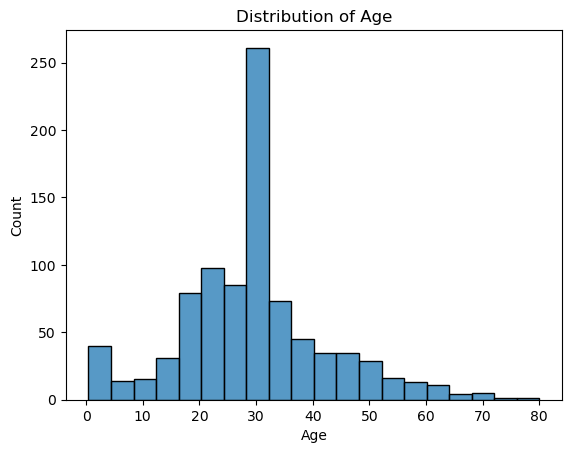

In [34]:
# Visualize the distribution of passengers' age
sns.histplot(data=df_train, x='Age', bins=20)
plt.title('Distribution of Age')
plt.show()

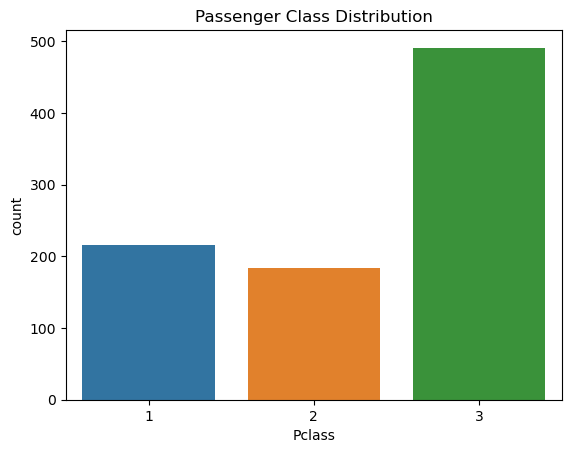

In [35]:
# Plot the distribution of passenger classes
sns.countplot(x='Pclass', data=df_train)
plt.title('Passenger Class Distribution')
plt.show()


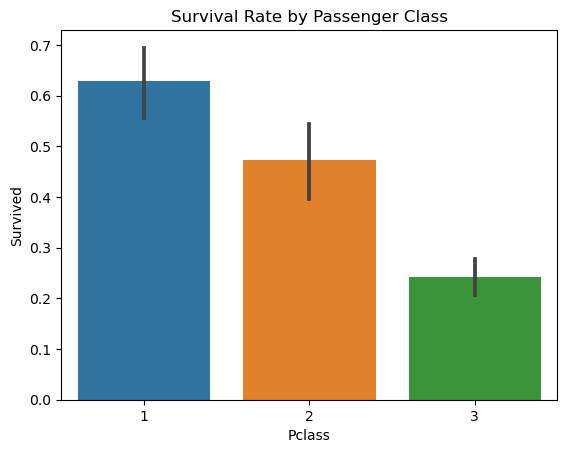

In [36]:
# Explore the survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Survival Rate by Passenger Class')
plt.show()

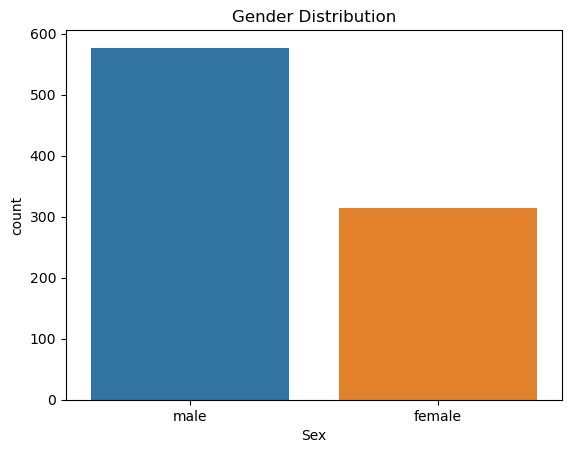

In [37]:
# Analyze the distribution of passengers' gender
sns.countplot(x='Sex', data=df_train)
plt.title('Gender Distribution')
plt.show()

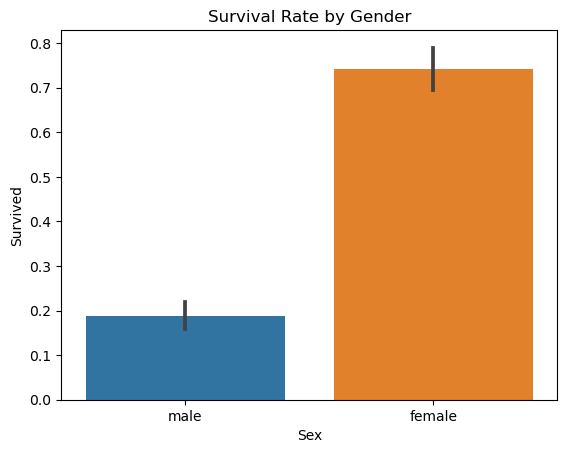

In [38]:
# Explore the survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Survival Rate by Gender')
plt.show()

/tmp/ipykernel_32/1772954979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_train.corr()


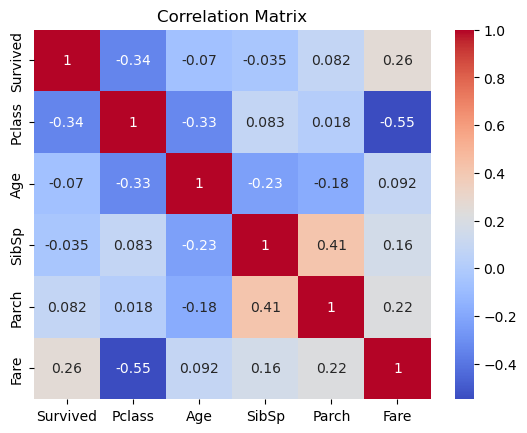

In [39]:
# Compute the correlation matrix
correlation = df_train.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Model Building

In [40]:
# import libraries
import sklearn as sl
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Convert categorical variables into numerical using one-hot encoding

In [41]:
df_train = pd.get_dummies(df_train,columns=['Sex','Embarked'],drop_first=True)

Split the dataset into features and target variable

In [42]:
x = df_train.drop('Survived',axis=1)
y = df_train['Survived']

Split the data into training and testing sets

In [43]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

Create a decision tree classifier

In [44]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_split=10)

Fit a classfier to the training data

In [45]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=10)

Make predictions on the testing data


In [46]:
y_pred = clf.predict(x_test)

Evaluate the model accuracy

In [47]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score",accuracy)

Accuracy Score 0.8491620111731844
